<a href="https://colab.research.google.com/github/qazalmehrban/Medical-Segmentation/blob/develop/Unet_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import nibabel as nib
import os 
import glob

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from skimage.transform import resize

import torch
import torch.nn as nn

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
samples = '/content/drive/MyDrive/samples/'
labels = '/content/drive/MyDrive/segmentation/'
mix = '/content/drive/MyDrive/New folder/'
root = '/content/drive/MyDrive/new_data/'
#patients = next(os.walk(samples))[2]

#segmentations =next(os.walk(labels))[2]


In [32]:
case_path = []
seg_path = []
for i in os.walk(root):
  print(i)
  patients_list = glob.glob(os.path.join(i[0]  , '*[0-9].*'))
  print(patients_list)
  patients_list.sort()
  case_path.extend(patients_list)


  segment_list = glob.glob(os.path.join(i[0]  ,'*n.*'))
  segment_list.sort()
  seg_path.extend(segment_list)
case_path.pop(0)
assert len(case_path) == len(seg_path)


('/content/drive/MyDrive/new_data/', ['UCL', 'ISBI', 'ISBI-1.5', 'BIDMC', 'I2CVB', 'HK'], [])
['/content/drive/MyDrive/new_data/ISBI-1.5']
('/content/drive/MyDrive/new_data/UCL', [], ['Case01.nii.gz', 'Case26.nii.gz', 'Case27.nii.gz', 'Case28.nii.gz', 'Case29.nii.gz', 'Case30.nii.gz', 'Case31.nii.gz', 'Case32.nii.gz', 'Case33.nii.gz', 'Case34.nii.gz', 'Case35.nii.gz', 'Case36.nii.gz', 'Case37.nii.gz', 'Case01_segmentation.nii.gz', 'Case27_segmentation.nii.gz', 'Case28_segmentation.nii.gz', 'Case26_segmentation.nii.gz', 'Case32_segmentation.nii.gz', 'Case33_segmentation.nii.gz', 'Case36_segmentation.nii.gz', 'Case35_segmentation.nii.gz', 'Case30_segmentation.nii.gz', 'Case29_segmentation.nii.gz', 'Case31_segmentation.nii.gz', 'Case34_segmentation.nii.gz', 'Case37_segmentation.nii.gz'])
['/content/drive/MyDrive/new_data/UCL/Case01.nii.gz', '/content/drive/MyDrive/new_data/UCL/Case26.nii.gz', '/content/drive/MyDrive/new_data/UCL/Case27.nii.gz', '/content/drive/MyDrive/new_data/UCL/Case28.

In [33]:
def slice_label(masks):

  l0 = []
  l1_0 =[]
  l2_0 = []
  l2_1_0 = []
  for i in range(masks.shape[-1]):
    uni = np.unique(masks[:,:,i])

    if len(uni) ==1:
      l0.append(i)
    elif (0 in uni) and (1 in uni) and not (2 in uni):
      l1_0.append(i)
    elif (0 in uni) and (2 in uni) and not (1 in uni):
      l2_0.append(i)
    else :
      l2_1_0.append(i)
  return {'label_0':l0, 'label_1_0':l1_0,'label_2_0': l2_0, 'label_2_1_0': l2_1_0}

In [34]:
m = nib.load(seg_path[30])
m=np.array(m.dataobj)
im = nib.load(case_path[30])
im=np.array(im.dataobj)
sl = slice_label(m)
sl

{'label_0': [0, 1, 2, 3, 4, 15, 16, 17, 18, 19],
 'label_1_0': [],
 'label_2_0': [14],
 'label_2_1_0': [5, 6, 7, 8, 9, 10, 11, 12, 13]}

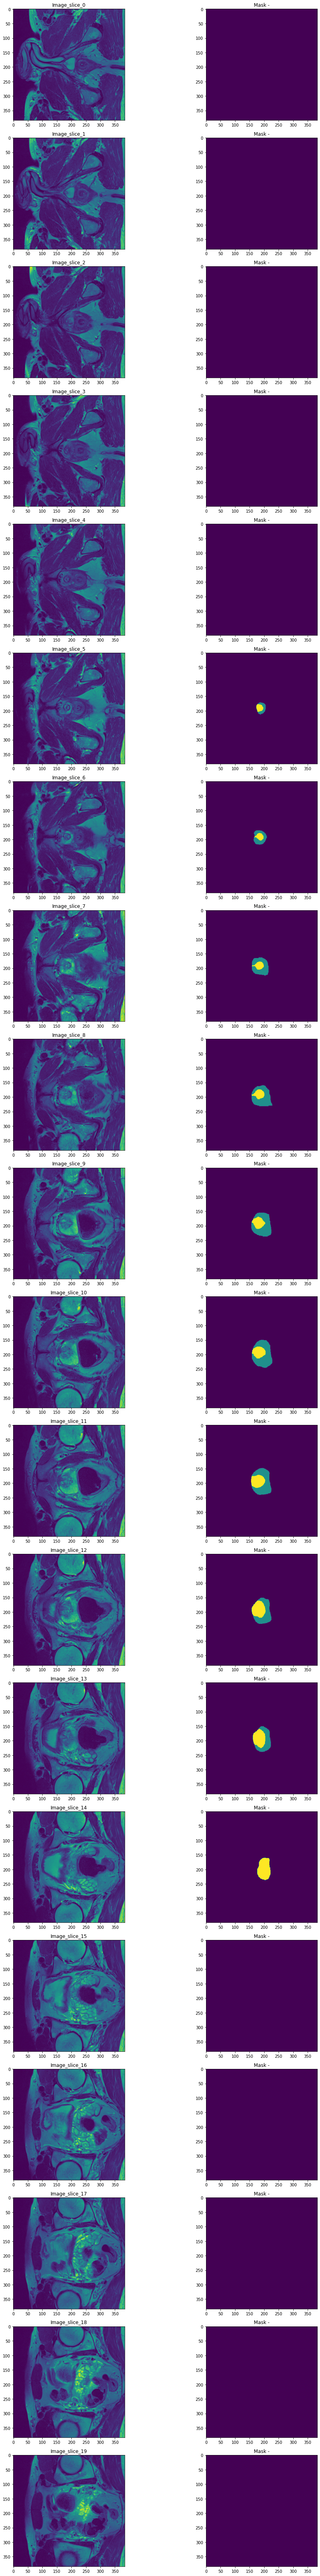

In [35]:
num_slice = m.shape[2]
fig, axs = plt.subplots(num_slice,2, figsize=(16,90))
count = 0
for x in range(num_slice):
     # select a random index
    axs[count][0].title.set_text(f"Image_slice_{count}") # set title
    axs[count][0].imshow(im[:,:,count]) # show MRI 
    axs[count][1].title.set_text("Mask -" ) # plot title on the mask (0 or 1)
    axs[count][1].imshow(m[:,:,count]) # Show corresponding mask
    count += 1

fig.tight_layout()

In [ ]:
m = nib.load(segment_list[70])
m=np.array(m.dataobj)
slice_label(m)

{'label_0': [0],
 'label_1_0': [],
 'label_2_0': [1, 2, 3, 4, 13, 14, 15, 16, 17, 18, 19],
 'label_2_1_0': [5, 6, 7, 8, 9, 10, 11, 12]}

In [ ]:
unique, counts = np.unique(m[:,:,12], return_counts=True)


In [ ]:
unique

array([0., 1., 2.], dtype=float32)

In [ ]:
counts

array([139939,    677,   6840])

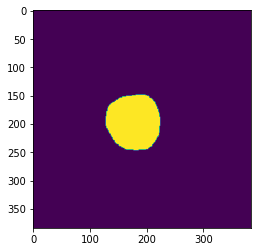

In [ ]:
plt.imshow(m[:,:,13])

In [ ]:
test = []
for i in segment_list:
  m = nib.load(i)
  m=np.array(m.dataobj)
  j = slice_label(m)
  test.extend(j['label_1_0'])



In [ ]:
test

[7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 5,
 6,
 7,
 8,
 9,
 10,

In [ ]:
slice_label(m)

{'label_0': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 'label_1_0': [],
 'label_2_0': [8, 20],
 'label_2_1_0': [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}

In [ ]:
k=[]
k.extend([])

In [ ]:
k

[]

In [ ]:
"def make_box(mask):
    '''
    this function return dict object contain bounding box of each pixel label and bbox of true value in bolean array
    '''
    box = []
    box_bool=[]
    obj_ids = np.unique(mask)
    if mask.dtype == bool:
        if len(np.unique(mask))==2:
            
            y_min = np.nonzero(mask)[0].min()
            y_max = np.nonzero(mask)[0].max()
            x_min = np.nonzero(mask)[1].min()
            x_max = np.nonzero(mask)[1].max()
            box=[x_min, y_min, x_max, y_max]
    else :
        mask_bool = mask.astype(np.bool)
        if len(np.unique(mask_bool))==2:
            
            y_min = np.nonzero(mask_bool)[0].min()
            y_max = np.nonzero(mask_bool)[0].max()
            x_min = np.nonzero(mask_bool)[1].min()
            x_max = np.nonzero(mask_bool)[1].max()
            box_bool=[x_min, y_min, x_max, y_max]
        
        for i in  obj_ids[1:]:
            y_min = np.nonzero(mask==i)[0].min()
            y_max = np.nonzero(mask==i)[0].max()
            x_min = np.nonzero(mask==i)[1].min()
            x_max = np.nonzero(mask==i)[1].max()
            box.append([x_min, y_min, x_max, y_max])
    return_object = {'bbox_bool': box} if mask.dtype ==bool else {'bbox_label': dict(zip([f"label{int(i)}" for i in obj_ids[1:]],box)), 'bbox_bool' : box_bool}
    return return_object

In [ ]:
def bounding_box_plot(Masks_2d):
  
  print(f'labels_slice_{slices}', np.unique(Masks_2d))
  print('bounding_box', make_box(Masks_2d.astype(bool)))

  fig=px.imshow(Masks_2d)

  li = make_box(Masks_2d.astype(bool))

  k = dict(x0= li[0], x1= li[2], y0= li[1], y1= li[3])
  fig.add_shape(
    type='rect',
    **k,
    xref='x', yref='y',
    line_color='cyan'
  )
  fig.show()

In [ ]:
def crop_specific(im, mask, crop_size):
        
        k=make_box(mask.astype(np.bool))
        if len(k['bbox_bool'])!=0:
            b_list = k['bbox_bool']
            x_min, y_min, x_max, y_max = b_list
            
            length_x = x_max -x_min + 1
            length_y = y_max - y_min + 1
            del_x = crop_size - length_x 
            del_y = crop_size - length_y 

            if del_x%2==0:
                kx = del_x//2
                sx=0
            else:
                kx = del_x//2

                sx = 1
            if del_y%2==0:
                ky = del_y//2
                sy=0
            else:
                ky = del_y//2
                sy = 1
            
            crop = mask[ y_min - ky - sy : y_max + ky + 1, x_min - kx - sx : x_max + kx  + 1]
            crop_im = im[ y_min - ky - sy : y_max + ky + 1, x_min - kx - sx : x_max + kx  + 1]
            return crop_im, crop, 


In [ ]:
crop_size = 192
p_seg = []
p_im = []
for patient_file, segment_file in zip( patients_list[:60], segment_list[:60]):
    im = nib.load(patient_file)    
    im = np.array(im.dataobj)

    Masks = nib.load(segment_file)    
    Masks = np.array(Masks.dataobj)
    Masks.shape
    for  j in range(Masks.shape[2]):
      k=make_box(Masks[:,:,j].astype(np.bool))
      if len(k['bbox_bool'])!=0:
        crop_im , crop = crop_specific(im[:,:,j], Masks[:,:,j], crop_size= crop_size)
        p_seg.append(crop)
        p_im.append(crop_im)


    
   

In [ ]:
crop_size = 192
p_seg_t = []
p_im_t = []
for patient_file, segment_file in zip( patients_list[60:], segment_list[60:]):
    im = nib.load(patient_file)    
    im = np.array(im.dataobj)

    Masks = nib.load(segment_file)    
    Masks = np.array(Masks.dataobj)
    Masks.shape
    for  j in range(Masks.shape[2]):
      k=make_box(Masks[:,:,j].astype(np.bool))
      if len(k['bbox_bool'])!=0:
        crop_im , crop = crop_specific(im[:,:,j], Masks[:,:,j], crop_size= crop_size)
        p_seg_t.append(crop)
        p_im_t.append(crop_im)



In [ ]:
segment_numpy = np.stack(p_seg,0)
image_numpy = np.stack(p_im, 0)

segment_numpy_t = np.stack(p_seg_t,0)
image_numpy_t = np.stack(p_im_t, 0)

In [ ]:
train = image_numpy/image_numpy.max()
test = image_numpy_t/image_numpy.max()

In [ ]:
train_seg_bolean = segment_numpy.astype(bool)
test_seg_bolean = segment_numpy_t.astype(bool)

In [ ]:
test_seg_f = np.float32(test_seg_bolean)
train_seg_f = np.float32(train_seg_bolean)

# Pytorch

In [ ]:
train_image_torch = np.expand_dims(train,1)
train_seg_torch  = np.expand_dims(train_seg_f,1)

In [ ]:
def conv3x3_bn_relu(inp_activation, output_activation, BN=True, activation = True):
    "con 3x3 + Batchnormalization + relu"
    layer = [nn.Conv2d(inp_activation, output_activation, 3, padding = 1)]
    for i, j in zip([nn.BatchNorm2d(output_activation), nn.ReLU(inplace=True)],[BN, activation]):
        if j==True:
            layer.append(i)
    return nn.Sequential(*layer)
    
    
    
class conv_block(nn.Module):
    
    def __init__(self, inp_activation, list_filter, BN = False):
        super().__init__()
        self.conv3x3_1 = conv3x3_bn_relu(inp_activation, list_filter, BN=BN)
        self.conv3x3_2 = conv3x3_bn_relu(list_filter, list_filter, BN=BN)
    def forward(self , inp):
        c = self.conv3x3_1(inp)
        c = self.conv3x3_2(c)
        return c
        
class Unet(nn.Module):
    def __init__(self, n_class):
        
        super().__init__()
        self.en_block1 = conv_block(1,32)
        self.en_block2 = conv_block(32,64)
        self.en_block3 = conv_block(64,128)
        self.en_block4 = conv_block(128,256)
        self.en_block5 = conv_block(256,512)
        self.en_block6 = conv_block(512, 1024)

        
        self.transpose5 = nn.ConvTranspose2d(1024,512,2,2)
        self.transpose4 = nn.ConvTranspose2d(512,256,2,2)

        self.transpose3 = nn.ConvTranspose2d(256,128,2,2)
        self.transpose2 = nn.ConvTranspose2d(128,64,2,2)
        self.transpose1 = nn.ConvTranspose2d(64,32,2,2)
        
        self.de_block1 = conv_block(64,32)
        self.de_block2 = conv_block(128,64)
        self.de_block3 = conv_block(256,128)

        self.de_block4 = conv_block(512, 256)
        self.de_block5 = conv_block(1024, 512)
        self.out_conv = nn.Conv2d(32, 1, 1)

        
    

    def forward(self, inp):
        el1 = self.en_block1(inp) #  (32,h,w)
        #print('el1',el1.shape)
        max1 = nn.MaxPool2d(2)(el1) # (32,h//2, w//2)
        #print('max1',max1.shape)

        el2 = self.en_block2(max1)    #(64, h//2, w//2)
        #print('el2',el2.shape)

        max2 = nn.MaxPool2d(2)(el2)  #(64, h//4, w//4)
        #print('max2',max2.shape)

        el3 = self.en_block3(max2)    #(128, h//4, w//4)
        #print('el3',el3.shape)

        max3 = nn.MaxPool2d(2)(el3)  #(128, h//8, w//8)
        #print('max3',max3.shape)


        el4 = self.en_block4(max3)    #(256, h//8, w//8)
        #print('el4',el4.shape)

        max4 = nn.MaxPool2d(2)(el4)  #(256, h//16, w//16)
        #print('max4',max4.shape)

        el5 = self.en_block5(max4)  #(512, h//16, w//16)
        #print('el5',el5.shape)

        max5 = nn.MaxPool2d(2)(el5)  #(512, h//32, w//32)
        #print('max5',max5.shape)

        
        el6 = self.en_block6(max5)  #(1024, h//32, w//32)
        #print('el6',el6.shape)


        tl5 = self.transpose5(el6)  #(512, h//16, w//16)
        #print('tl5',tl5.shape)

        cat5 = torch.cat([tl5, el5], 1) #(1024, h//16, h//16 )
        #print('cat5',cat5.shape)

        d5 =  self.de_block5(cat5)      #(512, h//16, w//16
        #print('d5',d5.shape)

        
        tl4 = self.transpose4(d5)       #(256, h//8, w//8)
        cat4 = torch.cat([tl4, el4], 1) #(512, h//8, w//8)
        d4 =  self.de_block4(cat4)     #(256, h//8, w//8)
        
        tl3 = self.transpose3(d4)        #(128, h//4, w//4)
        cat3 = torch.cat([tl3, el3], 1)  #(256, h//4, w//4)
        d3 =  self.de_block3(cat3)        #(128, h//4, w//4)
        
        
        tl2 = self.transpose2(d3)          #(64, h//2, w//2)
        cat2 = torch.cat([tl2, el2], 1)   #(128, h//2, w//2)
        d2 =  self.de_block2(cat2)         #(64, h//2, w//2)
        
        tl1 = self.transpose1(d2)          #(32, h, w)
        cat1 = torch.cat([tl1, el1], 1) #(64, h, w)
        d1 =  self.de_block1(cat1)        #(32, h, w)
        output = self.out_conv(d1) 

        return output


In [ ]:
m = Unet(2)

In [ ]:
X = torch.rand(4,1,192,192)

In [ ]:
m(X.to(device)).shape

torch.Size([4, 1, 192, 192])

In [ ]:
m.to(torch.device('cuda'))

Unet(
  (en_block1): conv_block(
    (conv3x3_1): Sequential(
      (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
    )
    (conv3x3_2): Sequential(
      (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
    )
  )
  (en_block2): conv_block(
    (conv3x3_1): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
    )
    (conv3x3_2): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
    )
  )
  (en_block3): conv_block(
    (conv3x3_1): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
    )
    (conv3x3_2): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
    )
  )
  (en_block4): conv_block(
    (conv3x3_1): Seq

In [ ]:
d_tr = torch.utils.data.DataLoader(train_image_torch,32)
d_seg = torch.utils.data.DataLoader(train_seg_torch,32)

In [ ]:
device = torch.device('cuda')

In [ ]:
opt = torch.optim.Adam(m.parameters())

In [ ]:
loss = torch.nn.BCEWithLogitsLoss()

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')

In [ ]:
ep=30

In [ ]:
for epoch in range(ep):
  for im , segi in zip(d_tr, d_seg):
    im = im.to(device=device)
    segi =segi.to(device)
    yh = m(im)
    l = loss(yh, segi)
    opt.zero_grad()
    l.backward()
    opt.step()
  print(f"epoch{epoch} loss is :", l)

epoch30 loss is : tensor(0.5245, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
epoch30 loss is : tensor(0.5317, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
epoch30 loss is : tensor(0.5307, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
epoch30 loss is : tensor(0.5326, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)


KeyboardInterrupt: ignored

In [ ]:
torch.cuda.current_device()


0

In [ ]:
torch.cuda.is_available()

True

In [ ]:
torch.cuda.device_count()

1

# tensorflow

In [ ]:
IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS  =crop_size, crop_size, 1

In [ ]:
def conv_block(channel, drop = None, l2 = True):
  seq = keras.Sequential()
  seq.add(layers.Conv2D(channel, (3,3), activation='relu',kernel_regularizer='l2', kernel_initializer='he_normal',
                padding='same'))
  if drop!= None:
    seq.add(
    layers.Dropout(drop))
  seq.add(layers.Conv2D(channel, (3,3), activation='relu', kernel_initializer='he_normal',
                padding='same'))
    
  return seq


In [ ]:
def conv_block(channel, drop = None, l2 = True):
  seq = keras.Sequential()
  seq.add(layers.Conv2D(channel, (1,1), activation='relu',kernel_regularizer='l2', kernel_initializer='he_normal',
                padding='same'))
  if drop!= None:
    seq.add(
    layers.Dropout(drop))
  seq.add(layers.Conv2D(channel, (3,3), activation='relu', kernel_initializer='he_normal',
                padding='same'))
  seq.add(layers.Conv2D(channel, (1,1), activation='relu', kernel_initializer='he_normal',
                padding='same'))
    
  return seq


In [ ]:
del conv_block

In [ ]:
class conv_block(tf.keras.layers.Layer):

  def __init__(self, channel, **kwargs):
        super(conv_block, self).__init__(**kwargs)
        self.c1x1 = layers.Conv2D(channel, (1,1), activation='relu', kernel_initializer='he_normal',
                padding='same')
        self.c3x3 = layers.Conv2D(channel, (3,3), activation='relu', kernel_initializer='he_normal',
                padding='same')
        self.c1x1_2 = layers.Conv2D(channel, (1,1), activation='relu', kernel_initializer='he_normal',
                padding='same')
        self.co =  layers.Conv2D(channel, (1,1), activation='relu', kernel_initializer='he_normal',
                padding='same')


  def call(self, inputs, training=None):
    l1 = self.c1x1(inputs)
    l1 = self.c3x3(l1)
    l1 = self.c1x1_2(l1)
    inp_mod = self.co(inputs)
    out = l1 + inp_mod
    return out
        

In [ ]:
j = conv_block(34)

In [ ]:
x = tf.random.normal((20, 39,39,7))

In [ ]:
j(x).shape

TensorShape([20, 39, 39, 34])

In [ ]:
def U_Net_Segmentation(input_size=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), drop = None, l2 = True):
    
    inputs = tf.keras.Input(input_size)
    
    
    c1=conv_block(16, drop=drop, l2=l2)(inputs)
    p1 = layers.MaxPooling2D((2,2))(c1)


    c2 = conv_block(32, drop=drop, l2=l2)(p1)
    p2 = layers.MaxPooling2D((2,2))(c2)


    c3 = conv_block(64, drop=drop, l2=l2)(p2)
    p3 = layers.MaxPooling2D((2,2))(c3)


    c4 = conv_block(128, drop=drop, l2=l2)(p3)
    p4 = layers.MaxPooling2D((2,2))(c4)


    c5 = conv_block(256, drop=drop, l2=l2)(p4)
    p5 = layers.MaxPooling2D((2,2))(c5)

    c6 = conv_block(256, drop=drop, l2=l2)(p5)



    u7 = layers.Conv2DTranspose(256, (2,2), strides=(2,2), padding='same')(c6)
    u7 = layers.concatenate([u7, c5])
    c7 = layers.Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal',
                padding='same')(u7)

    c7 = layers.Dropout(0.2)(c7)
    c7 = layers.Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal',
                padding='same')(c7)   

    u6 = layers.Conv2DTranspose(128, (2,2), strides=(2,2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal',
                padding='same')(u6)
    c6 = layers.Dropout(0.2)(c6)
    c6 = layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal',
                padding='same')(c6)   


    u7 = layers.Conv2DTranspose(64, (2,2), strides=(2,2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal',
                padding='same')(u7)
    c7 = layers.Dropout(0.2)(c7)
    c7 = layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal',
                padding='same')(c7) 

    u8 = layers.Conv2DTranspose(32, (2,2), strides=(2,2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal',
                padding='same')(u8)
    c8 = layers.Dropout(0.1)(c8)
    c8 = layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal',
                padding='same')(c8) 
    
    
    u9 = layers.Conv2DTranspose(16, (2,2), strides=(2,2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1], axis = 3)
    c9 = layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal',
                padding='same')(u9)
    c9 = layers.Dropout(0.1)(c9)
    c9 = layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal',
                padding='same')(c9) 
    
    outputs = layers.Conv2D(2,(1,1), activation="softmax",)(c9)
    
    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    
    return model

In [ ]:
def Dice(y_true, y_pred):

    
    
  mask1 = tf.math.argmax(y_pred, axis=-1)

  y_pred= tf.cast(mask1, tf.float32)
  inter = tf.reduce_sum(y_pred * y_true, [1,2])
  uni = tf.reduce_sum(y_pred , [1,2])+ tf.reduce_sum( y_true, [1,2])

  des = tf.reduce_mean(2*inter/uni)
       
  return des



In [ ]:
model = U_Net_Segmentation()
model.summary()

TypeError: ignored

In [ ]:
optimizer = tf.keras.optimizers.Adam()


In [ ]:
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=[Dice])
                 

In [ ]:
# This function keeps the initial learning rate for the first ten epochs
# and decreases it exponentially after that.
def scheduler(epoch, lr):
  if epoch < 30:
    return lr
  else:
    return lr * 0.1



In [ ]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)


In [ ]:
results = model.fit(train, train_seg_f,
                    shuffle = True,
                    validation_split = 0.1,
                    batch_size=32,
                    epochs=70)

Epoch 1/70
24/24 [==============================] - 6s 196ms/step - loss: 0.5122 - Dice: 0.0136 - val_loss: 0.3897 - val_Dice: 0.0000e+00
Epoch 2/70
24/24 [==============================] - 4s 180ms/step - loss: 0.3501 - Dice: 0.0000e+00 - val_loss: 0.2719 - val_Dice: 0.0000e+00
Epoch 3/70
24/24 [==============================] - 4s 181ms/step - loss: 0.2496 - Dice: 0.0000e+00 - val_loss: 0.2343 - val_Dice: 0.0000e+00
Epoch 4/70
24/24 [==============================] - 4s 182ms/step - loss: 0.2261 - Dice: 2.2721e-07 - val_loss: 0.2240 - val_Dice: 0.0000e+00
Epoch 5/70
24/24 [==============================] - 4s 184ms/step - loss: 0.2172 - Dice: 0.0022 - val_loss: 0.2156 - val_Dice: 3.9042e-04
Epoch 6/70
24/24 [==============================] - 4s 183ms/step - loss: 0.2077 - Dice: 0.0597 - val_loss: 0.2087 - val_Dice: 0.6065
Epoch 7/70
24/24 [==============================] - 4s 185ms/step - loss: 0.1929 - Dice: 0.3896 - val_loss: 0.2258 - val_Dice: 0.4855
Epoch 8/70
24/24 [============

In [ ]:
loss = results.history['loss']
val_loss = results.history['val_Dice']

epochs = range(70)

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss Cross entropy')
plt.plot(epochs, val_loss, 'bo', label='Validation Dice Metric')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

In [ ]:
def display_mask(i):
    """Quick utility to display a model's prediction."""
    mask = np.argmax(val_preds[i], axis=-1)
    mask = np.expand_dims(mask, axis=-1)
    img = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(mask))
    display(img)

pr = model.predict(test_image[:7])

In [ ]:
mask1 = np.argmax(pr[2], axis=-1)
plt.imshow(mask1)


In [ ]:
plt.imshow(test_seg_f[2])
